In [1]:
pip install ndlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 27.5 MB/s 
     |████████████████████████████████| 3.1 MB 39.9 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.9.11-py3-none-any.whl size=9074 sha256=939513ed3c9be802791a6dc7e69539c23447d143c2de765257af1d52dcd7bb0d
  Stored in directory: /root/.cache/pip/wheels/7d/e4/0c/0c83f70bd0b99ce8aea47a21f8e52502169e7dd17808d12f30
Successfully built python-igraph


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import pandas as pd
import networkx as nx
from sklearn.cluster import KMeans
import numpy as np 
from math import *

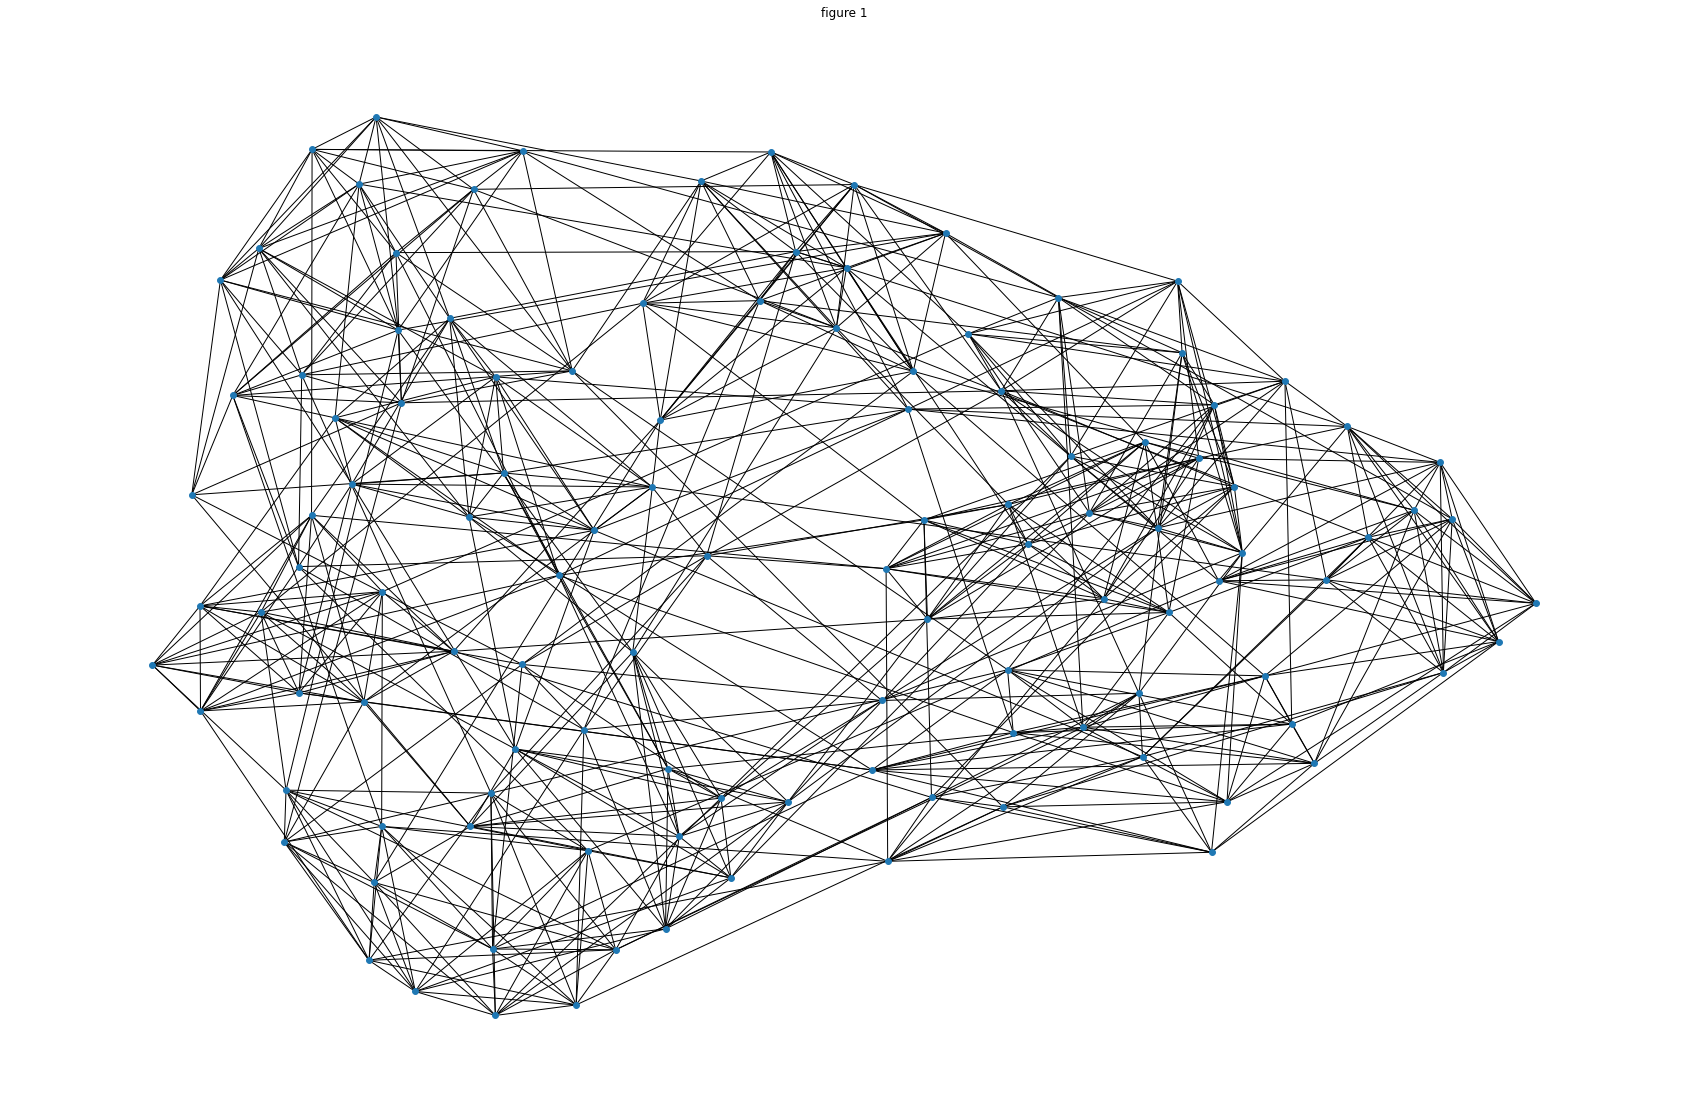

In [3]:
plt.figure(figsize=(30,20))
G=nx.read_edgelist('football.txt',create_using=nx.Graph(),nodetype=int)
sp=nx.spring_layout(G)

nx.draw_networkx(G,pos=sp,with_labels=False,node_size=35)
plt.title('figure 1')

plt.axis('off')

plt.show()

In [4]:
def TOPSIS(G1): # fonction topsis
    betCent = nx.betweenness_centrality(G1)  # pour caculer  BC
    closCent = nx.closeness_centrality(G1)   # pour caculer  CC
    degCent = nx.degree_centrality(G1)       # pour caculer  DC
    eigCent = nx.eigenvector_centrality(G1)    # pour caculer EC

   

    BC = []
    DC = []
    EC = []
    CC = []

    for i in sorted(betCent):
        BC.append(betCent[i])

    for i in sorted(closCent):
        CC.append(closCent[i])

    for i in sorted(degCent):
        DC.append(degCent[i])

    for i in sorted(eigCent):
        EC.append(eigCent[i])

    #Creation de la matrice de  data 
    mat = pd.DataFrame({'DC' : DC,
                        'CC' : CC,
                        'BC' : BC,
                        'EC' : EC})


    DC_denom = sqrt((mat['DC']**2).sum())
    CC_denom = sqrt((mat['CC']**2).sum())
    BC_denom = sqrt((mat['BC']**2).sum())
    EC_denom = sqrt((mat['EC']**2).sum())

    """##  Normalisation de  matrice"""

    mat_norm = pd.DataFrame({
        'DC' : mat['DC'] / DC_denom,
        'CC' : mat['CC'] / CC_denom,
        'BC' : mat['BC'] / BC_denom,
        'EC' : mat['EC'] / EC_denom,
    })

    """# weights """

    mat_norm_weighted = mat_norm

    mat_norm_weighted['DC'] = mat_norm_weighted['DC'] * 0.2
    mat_norm_weighted['EC'] = mat_norm_weighted['EC'] * 0.2
    mat_norm_weighted['BC'] = mat_norm_weighted['BC'] * 0.3
    mat_norm_weighted['CC'] = mat_norm_weighted['CC'] * 0.3

    """# Ideal best & Ideal worst"""

    DC_ideal_best = mat_norm_weighted['DC'].max()
    DC_ideal_worst = mat_norm_weighted['DC'].min()

    CC_ideal_best = mat_norm_weighted['CC'].max()
    CC_ideal_worst = mat_norm_weighted['CC'].min()

    BC_ideal_best = mat_norm_weighted['BC'].max()
    BC_ideal_worst = mat_norm_weighted['BC'].min()

    EC_ideal_best = mat_norm_weighted['EC'].max()
    EC_ideal_worst = mat_norm_weighted['EC'].min()

    """## S+ & S-"""

    mat_norm_weighted["from_best"] = (mat_norm_weighted["DC"] - DC_ideal_best)**2 + (mat_norm_weighted['CC'] - CC_ideal_best)**2 + (mat_norm_weighted['BC'] - BC_ideal_best)**2 + (mat_norm_weighted['EC'] - EC_ideal_best)**2
    mat_norm_weighted["from_worst"] = (mat_norm_weighted["DC"] - DC_ideal_worst)**2 + (mat_norm_weighted['CC'] - CC_ideal_worst)**2 + (mat_norm_weighted['BC'] - BC_ideal_worst)**2 + (mat_norm_weighted['EC'] - EC_ideal_worst)**2

    """## sqrt pour la distance"""

    mat_norm_weighted["from_best"] = mat_norm_weighted["from_best"].apply(lambda x : sqrt(x))
    mat_norm_weighted["from_worst"] = mat_norm_weighted["from_worst"].apply(lambda x : sqrt(x))

    """# ratio"""

    mat_norm_weighted['ratio'] = mat_norm_weighted['from_worst'] / (mat_norm_weighted['from_worst'] + mat_norm_weighted['from_best'])

    """#  Enregistrer les resultats """

    result = mat

    result['TOPSIS'] = mat_norm_weighted['ratio']
    result.sort_values(by="TOPSIS", ascending=False ,inplace=True)

    result.reset_index(inplace=True)

    result.rename(columns={"index" : "node"}, inplace=True)

    #

    return result

In [5]:
data=TOPSIS(G)
data.to_csv("TOPSIS_result_football.csv", index = False)

In [6]:
data

,node,DC,CC,BC,EC,TOPSIS
0,0,0.105263,0.423792,0.032490,0.106503,0.924560
1,64,0.096491,0.422222,0.033533,0.100915,0.912863
2,106,0.096491,0.435115,0.029161,0.090415,0.819665
3,41,0.087719,0.436782,0.028823,0.079146,0.786272
4,74,0.096491,0.404255,0.025187,0.080489,0.699216
...,...,...,...,...,...,...
110,88,0.087719,0.377483,0.006498,0.070452,0.154306
111,97,0.087719,0.391753,0.005317,0.080728,0.151214
112,91,0.061404,0.370130,0.007790,0.048312,0.149053
113,21,0.087719,0.386441,0.004372,0.081921,0.139444
